#  Housing Price Prediction - Regression Analysis

This notebook implements a comprehensive regression workflow for predicting housing prices.

## Workflow Steps:
1. Data Loading & Initial Exploration
2. Data Visualization & Relationships
3. Simple Regression Models (One predictor at a time)
4. Multiple Regression Model
5. Model Refinement
6. Model Validation
7. Model Interpretation & Predictions

---
##  Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully!")

 Libraries imported successfully!


---
##  Data Loading & Initial Exploration

Load the dataset and perform initial exploration to understand the data structure.

In [2]:
# Load training data
train_df = pd.read_csv('train_100k.csv')
print(" Training Data Loaded")
print(f"Shape: {train_df.shape}")
print(f"Rows: {train_df.shape[0]:,} | Columns: {train_df.shape[1]}")

# Display first few rows
train_df.head()

 Training Data Loaded
Shape: (80000, 12)
Rows: 80,000 | Columns: 12


,Id,LotArea,OverallQual,YearBuilt,GrLivArea,GarageCars,FullBath,Bedrooms,Neighborhood,BuildingType,RoofStyle,SalePrice
0,75221,4128,2,1999,3173,2,2,1,West,1Fam,Hip,287816
1,48956,19511,9,1951,3551,0,1,5,North,Duplex,Gable,456786
2,44967,18949,8,1990,1250,3,3,2,Central,Townhouse,Gable,347872
3,13569,15984,1,2018,3045,3,2,4,South,2Fam,Gambrel,332344
4,92728,8247,7,1959,3090,2,3,5,Central,2Fam,Hip,358096


In [3]:
# Data types and missing values
print("\n Data Information:")
print("=" * 60)
train_df.info()


 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            80000 non-null  int64 
 1   LotArea       80000 non-null  int64 
 2   OverallQual   80000 non-null  int64 
 3   YearBuilt     80000 non-null  int64 
 4   GrLivArea     80000 non-null  int64 
 5   GarageCars    80000 non-null  int64 
 6   FullBath      80000 non-null  int64 
 7   Bedrooms      80000 non-null  int64 
 8   Neighborhood  80000 non-null  object
 9   BuildingType  80000 non-null  object
 10  RoofStyle     80000 non-null  object
 11  SalePrice     80000 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 7.3+ MB


In [4]:
# Check for missing values
print("\n Missing Values:")
print("=" * 60)
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print(" No missing values found!")
else:
    print(missing[missing > 0])


 Missing Values:
 No missing values found!


In [5]:
# Descriptive statistics for numeric features
print("\n Descriptive Statistics:")
print("=" * 60)
train_df.describe()


 Descriptive Statistics:


,Id,LotArea,OverallQual,YearBuilt,GrLivArea,GarageCars,FullBath,Bedrooms,SalePrice
count,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00
mean,50022.93,10531.96,4.98,1985.48,2251.99,1.50,2.00,3.00,312078.72
std,28869.65,5482.23,2.58,20.81,1009.17,1.12,0.82,1.41,73049.08
min,1.00,1000.00,1.00,1950.00,500.00,0.00,1.00,1.00,69874.00
25%,25029.75,5786.00,3.00,1967.00,1377.00,1.00,1.00,2.00,260120.50
50%,50047.00,10553.00,5.00,1986.00,2252.00,2.00,2.00,3.00,312176.00
75%,75038.25,15269.25,7.00,2004.00,3127.00,3.00,3.00,4.00,363680.00
max,99999.00,19999.00,9.00,2021.00,3999.00,3.00,3.00,5.00,554828.00


In [6]:
# Categorical features analysis
print("\n Categorical Features:")
print("=" * 60)
categorical_cols = ['Neighborhood', 'BuildingType', 'RoofStyle']

for col in categorical_cols:
    print(f"\n{col}:")
    print(train_df[col].value_counts())
    print(f"Unique values: {train_df[col].nunique()}")


 Categorical Features:

Neighborhood:
Neighborhood
West       16130
North      16087
Central    15973
East       15910
South      15900
Name: count, dtype: int64
Unique values: 5

BuildingType:
BuildingType
1Fam         20145
Duplex       19995
Townhouse    19984
2Fam         19876
Name: count, dtype: int64
Unique values: 4

RoofStyle:
RoofStyle
Hip        20104
Gambrel    19996
Gable      19963
Flat       19937
Name: count, dtype: int64
Unique values: 4



 Sale Price Statistics:
Mean: $312,078.72
Median: $312,176.00
Std Dev: $73,049.08
Min: $69,874.00
Max: $554,828.00


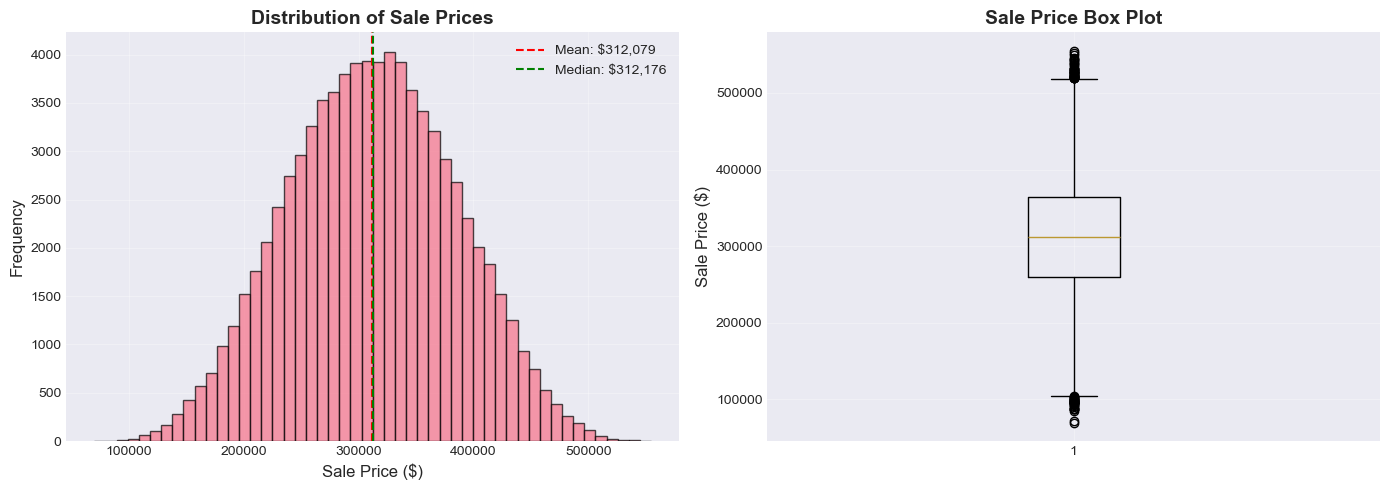

In [7]:
# Target variable (SalePrice) distribution
print("\n Sale Price Statistics:")
print("=" * 60)
print(f"Mean: ${train_df['SalePrice'].mean():,.2f}")
print(f"Median: ${train_df['SalePrice'].median():,.2f}")
print(f"Std Dev: ${train_df['SalePrice'].std():,.2f}")
print(f"Min: ${train_df['SalePrice'].min():,.2f}")
print(f"Max: ${train_df['SalePrice'].max():,.2f}")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sale Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Sale Prices', fontsize=14, fontweight='bold')
axes[0].axvline(train_df['SalePrice'].mean(), color='red', linestyle='--', label=f"Mean: ${train_df['SalePrice'].mean():,.0f}")
axes[0].axvline(train_df['SalePrice'].median(), color='green', linestyle='--', label=f"Median: ${train_df['SalePrice'].median():,.0f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(train_df['SalePrice'], vert=True)
axes[1].set_ylabel('Sale Price ($)', fontsize=12)
axes[1].set_title('Sale Price Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Prepare data for correlation analysis (encode categorical variables)
df_encoded = train_df.copy()

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print(" Categorical variables encoded for correlation analysis")

 Categorical variables encoded for correlation analysis



 Correlation with Sale Price:
SalePrice       1.00
GrLivArea       0.69
OverallQual     0.53
LotArea         0.38
GarageCars      0.15
YearBuilt       0.06
BuildingType    0.00
RoofStyle       0.00
FullBath        0.00
Id             -0.00
Bedrooms       -0.00
Neighborhood   -0.00
Name: SalePrice, dtype: float64


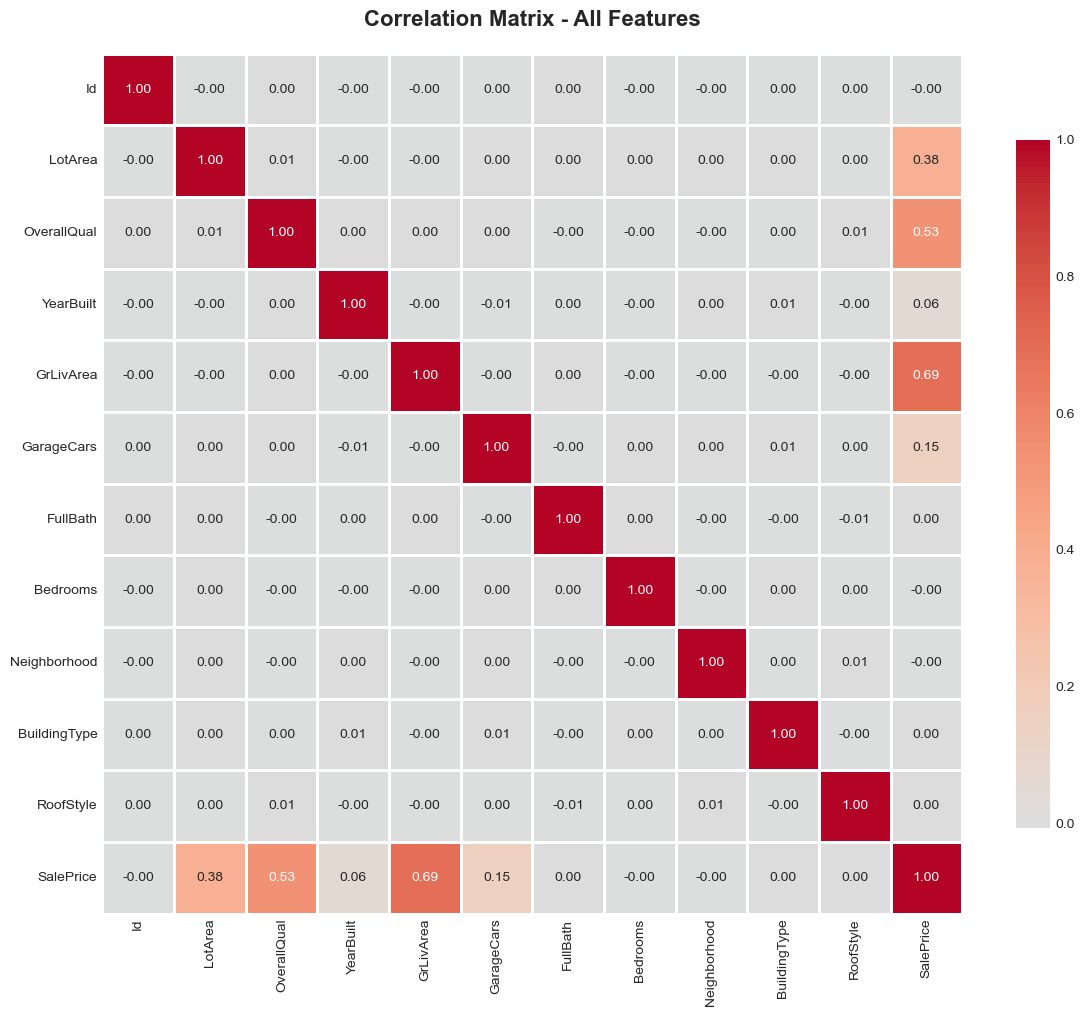

In [9]:
# Correlation matrix
print("\n Correlation with Sale Price:")
print("=" * 60)

# Calculate correlations
correlations = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
print(correlations)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

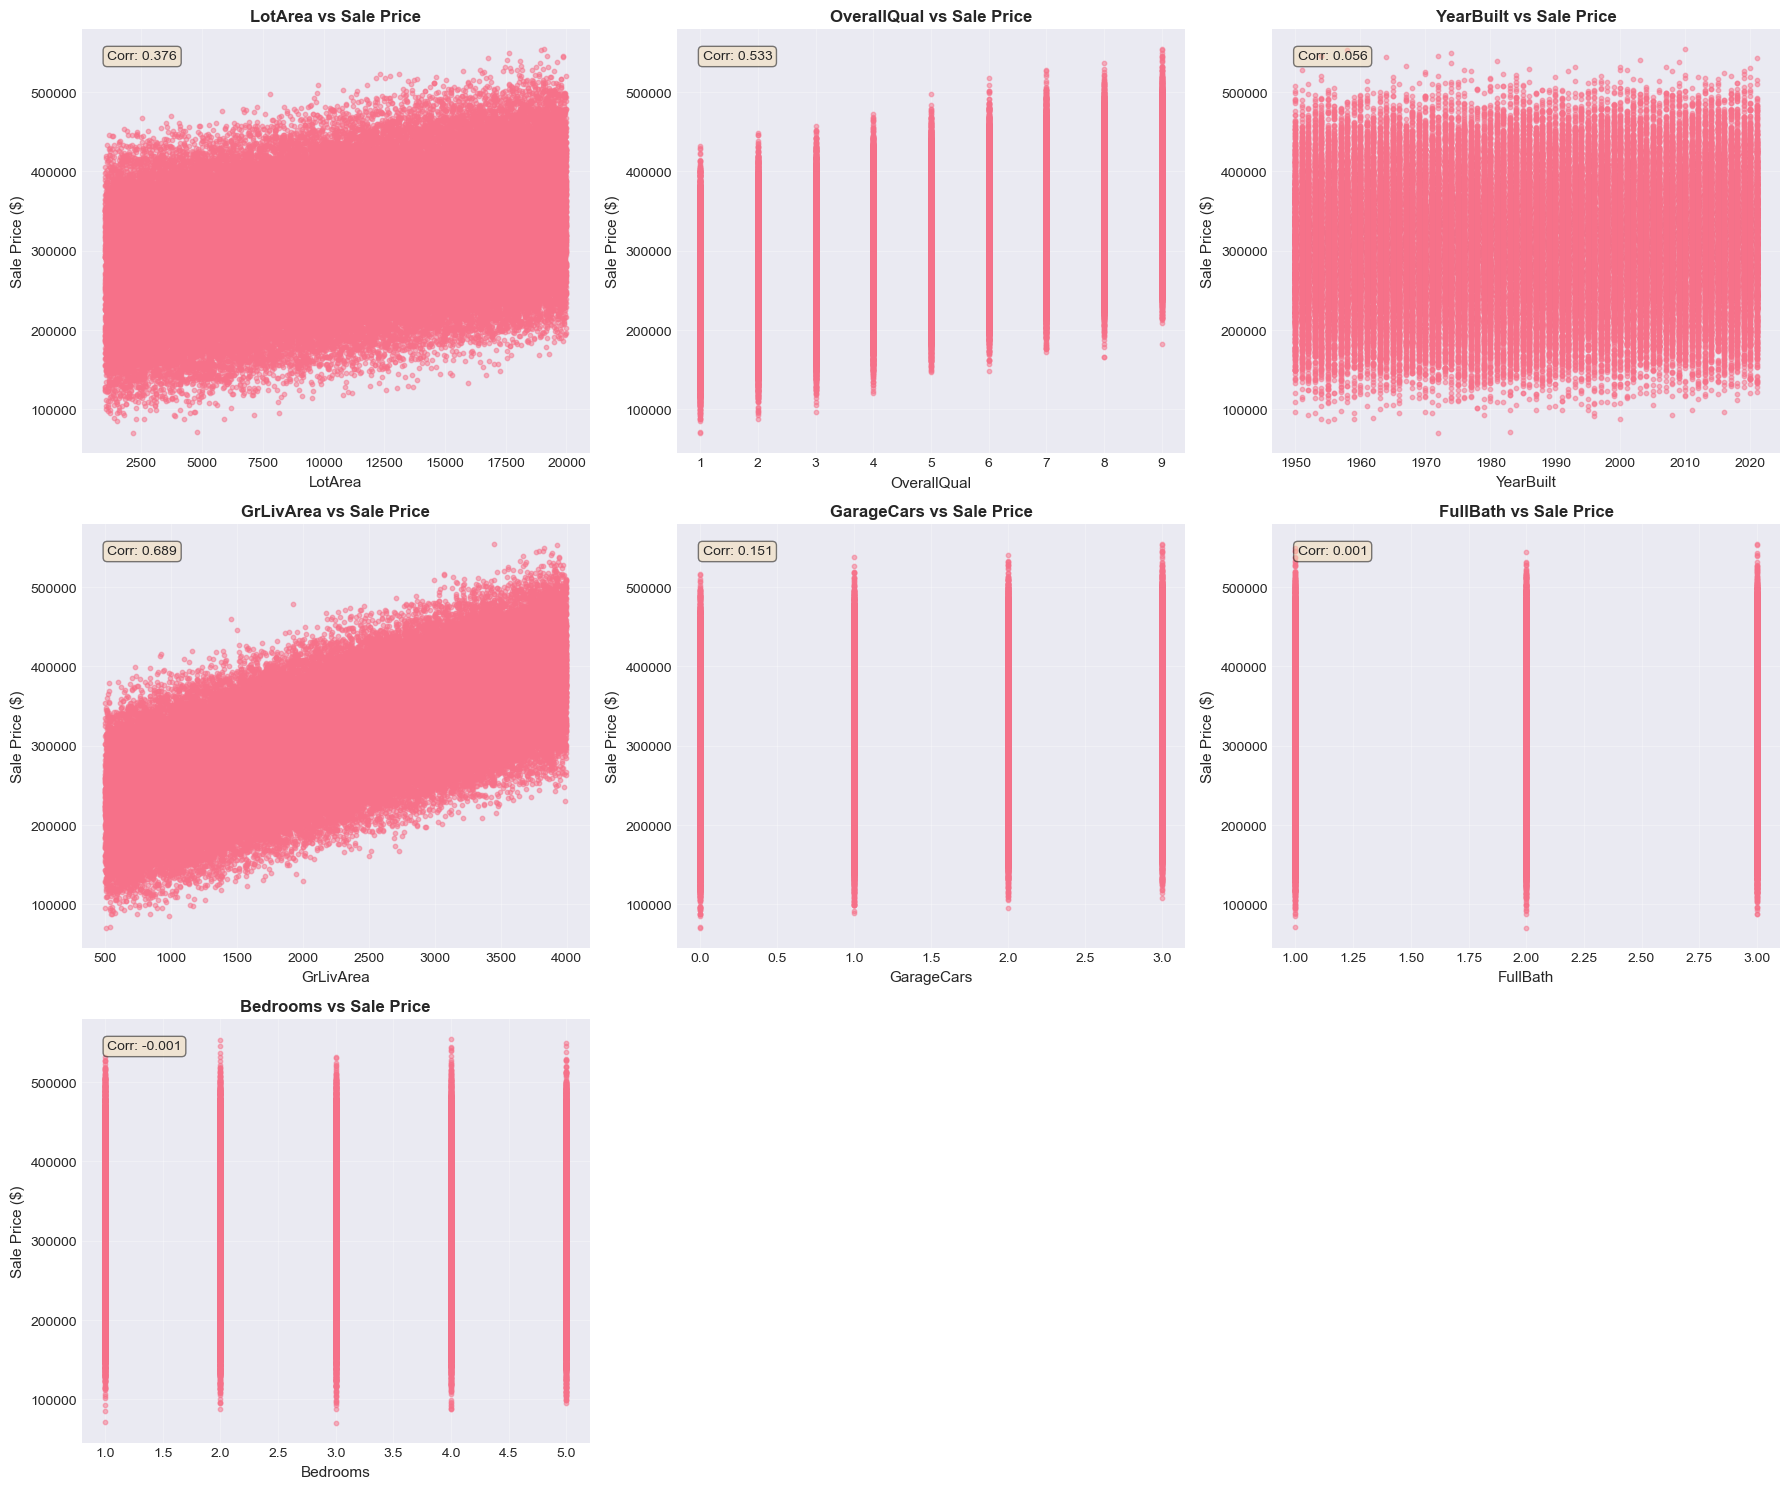

In [10]:
# Scatter plots for numeric features vs SalePrice
numeric_features = ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'FullBath', 'Bedrooms']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    axes[idx].scatter(train_df[feature], train_df['SalePrice'], alpha=0.5, s=10)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Sale Price ($)', fontsize=11)
    axes[idx].set_title(f'{feature} vs Sale Price', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = train_df[[feature, 'SalePrice']].corr().iloc[0, 1]
    axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                   transform=axes[idx].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   verticalalignment='top')

# Remove extra subplots
for idx in range(len(numeric_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

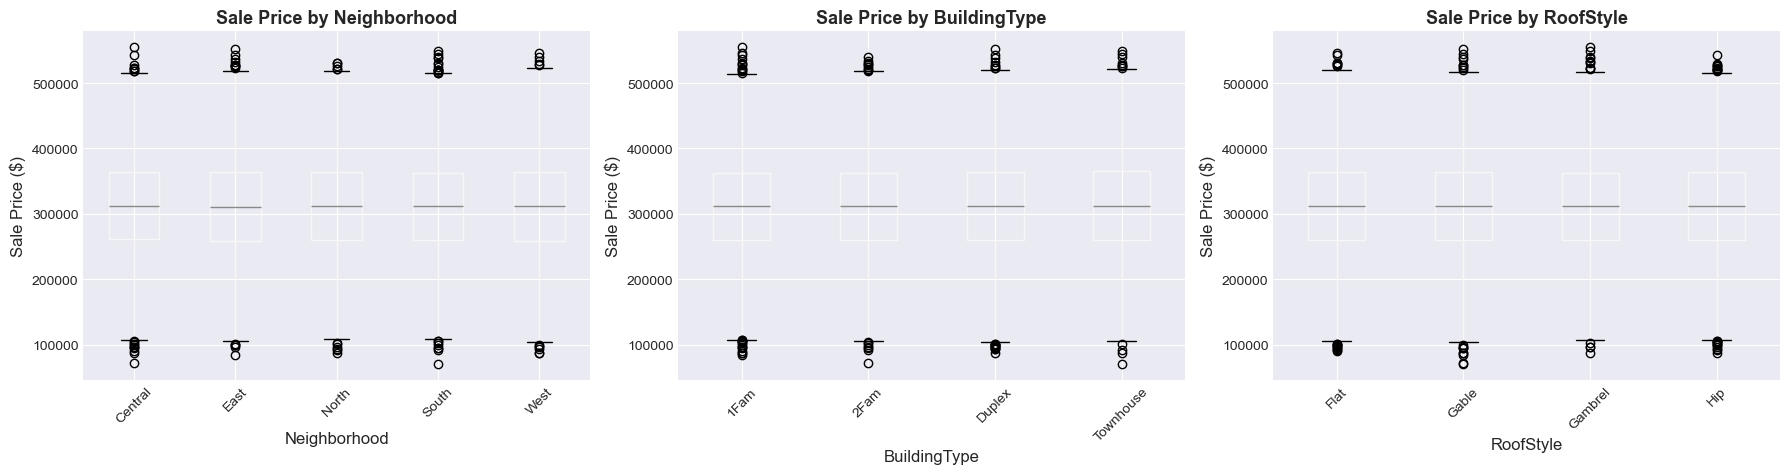

In [11]:
# Box plots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    train_df.boxplot(column='SalePrice', by=col, ax=axes[idx])
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Sale Price ($)', fontsize=12)
    axes[idx].set_title(f'Sale Price by {col}', fontsize=13, fontweight='bold')
    axes[idx].get_figure().suptitle('')  # Remove default title
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

---
##  Simple Regression Models (One Predictor at a Time)

Build individual linear regression models using one predictor at a time to identify the strongest predictors.

In [12]:
# Function to evaluate simple regression
def simple_regression_analysis(X, y, feature_name):
    """
    Perform simple linear regression and return metrics
    """
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    
    return {
        'Feature': feature_name,
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Coefficient': model.coef_[0] if len(model.coef_) == 1 else model.coef_,
        'Intercept': model.intercept_
    }

print(" Simple regression function defined")

 Simple regression function defined


In [13]:
# Perform simple regression for each numeric feature
print("\n Simple Linear Regression Results (Numeric Features):")
print("=" * 80)

simple_results = []

for feature in numeric_features:
    X = train_df[[feature]]
    y = train_df['SalePrice']
    
    result = simple_regression_analysis(X, y, feature)
    simple_results.append(result)
    
    print(f"\n{feature}:")
    print(f"  R² Score: {result['R²']:.4f}")
    print(f"  RMSE: ${result['RMSE']:,.2f}")
    print(f"  MAE: ${result['MAE']:,.2f}")
    print(f"  Coefficient: {result['Coefficient']:.4f}")
    print(f"  Intercept: ${result['Intercept']:,.2f}")

# Create DataFrame for comparison
simple_results_df = pd.DataFrame(simple_results)
simple_results_df = simple_results_df.sort_values('R²', ascending=False)

print("\n\n Summary Table (Sorted by R²):")
print("=" * 80)
print(simple_results_df[['Feature', 'R²', 'RMSE', 'MAE']].to_string(index=False))


 Simple Linear Regression Results (Numeric Features):

LotArea:
  R² Score: 0.1412
  RMSE: $67,694.24
  MAE: $55,330.31
  Coefficient: 5.0074
  Intercept: $259,340.88

OverallQual:
  R² Score: 0.2845
  RMSE: $61,790.58
  MAE: $50,903.50
  Coefficient: 15097.3743
  Intercept: $236,827.37

YearBuilt:
  R² Score: 0.0031
  RMSE: $72,933.57
  MAE: $59,332.55
  Coefficient: 196.9374
  Intercept: $-78,937.21

GrLivArea:
  R² Score: 0.4753
  RMSE: $52,913.13
  MAE: $43,177.81
  Coefficient: 49.9043
  Intercept: $199,694.54

GarageCars:
  R² Score: 0.0229
  RMSE: $72,208.56
  MAE: $58,770.03
  Coefficient: 9884.6583
  Intercept: $297,228.25

FullBath:
  R² Score: 0.0000
  RMSE: $73,048.56
  MAE: $59,418.55
  Coefficient: 116.5449
  Intercept: $311,845.65

Bedrooms:
  R² Score: 0.0000
  RMSE: $73,048.56
  MAE: $59,418.18
  Coefficient: -69.1441
  Intercept: $312,285.93


 Summary Table (Sorted by R²):
    Feature   R²     RMSE      MAE
  GrLivArea 0.48 52913.13 43177.81
OverallQual 0.28 61790.5

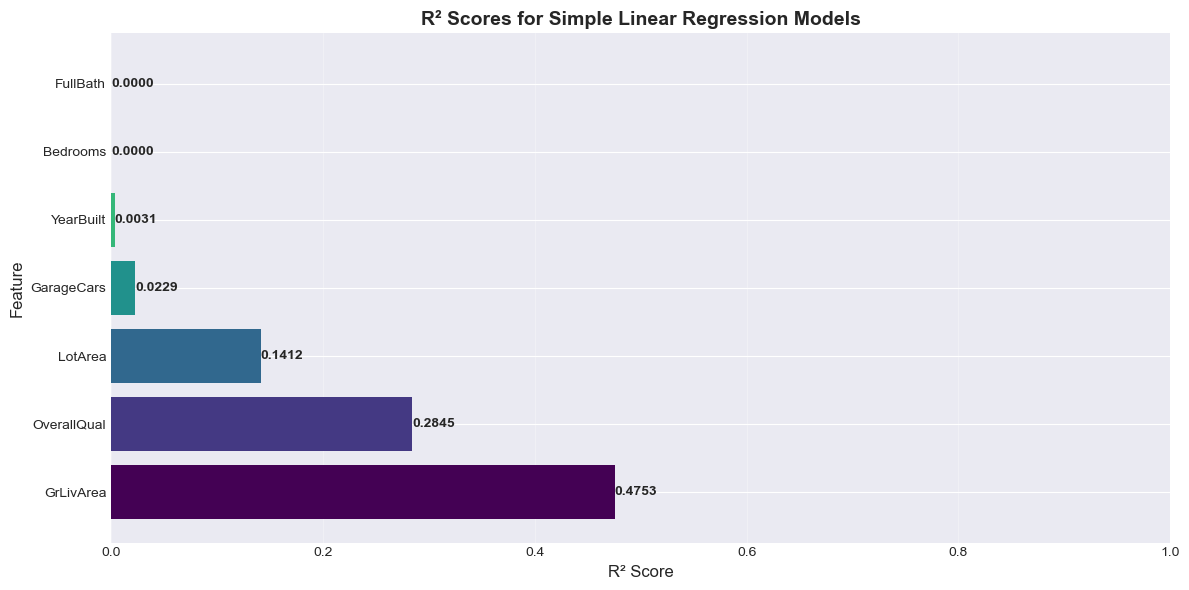


 Best single predictor: GrLivArea (R² = 0.4753)


In [14]:
# Visualize R² scores
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(simple_results_df)))
bars = plt.barh(simple_results_df['Feature'], simple_results_df['R²'], color=colors)
plt.xlabel('R² Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('R² Scores for Simple Linear Regression Models', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Best single predictor: {simple_results_df.iloc[0]['Feature']} (R² = {simple_results_df.iloc[0]['R²']:.4f})")

---
##  Multiple Regression Model

Combine all relevant predictors in a single model.

In [15]:
X_train = df_encoded.drop(['Id', 'SalePrice'], axis=1)
y_train = df_encoded['SalePrice']

print(f"Training features shape: {X_train.shape}")
print(f"Features: {list(X_train.columns)}")

Training features shape: (80000, 10)
Features: ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'FullBath', 'Bedrooms', 'Neighborhood', 'BuildingType', 'RoofStyle']


In [16]:
print("\n Training Multiple Linear Regression Model...")
print("=" * 80)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


y_train_pred = mlr_model.predict(X_train)


r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

print("\n Multiple Regression Results:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  RMSE: ${rmse_train:,.2f}")
print(f"  MAE: ${mae_train:,.2f}")
print(f"  Intercept: ${mlr_model.intercept_:,.2f}")


 Training Multiple Linear Regression Model...

 Multiple Regression Results:
  R² Score: 0.9250
  RMSE: $20,010.41
  MAE: $15,972.98
  Intercept: $-337,309.75



 Feature Coefficients:
     Feature  Coefficient
 OverallQual     14954.19
  GarageCars      9984.03
   YearBuilt       198.80
   GrLivArea        49.98
Neighborhood       -39.23
   RoofStyle       -38.62
BuildingType        29.27
    FullBath        19.85
    Bedrooms        10.45
     LotArea         4.99


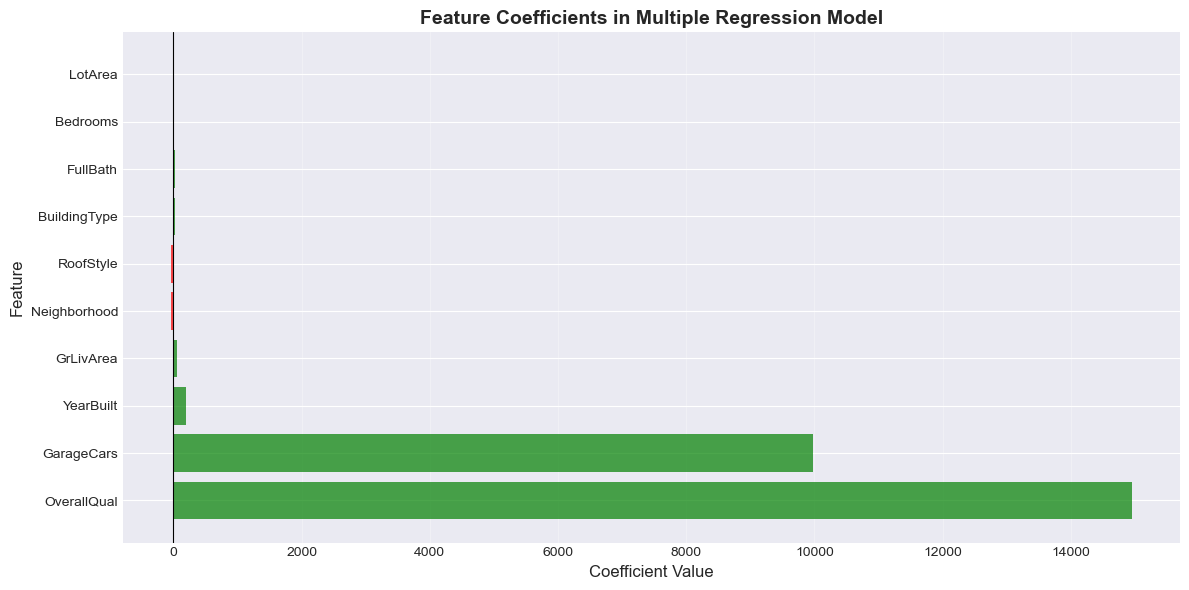

In [17]:
print("\n Feature Coefficients:")
print("=" * 80)

coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': mlr_model.coef_
})
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

print(coefficients_df[['Feature', 'Coefficient']].to_string(index=False))

plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients_df['Coefficient']]
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients in Multiple Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

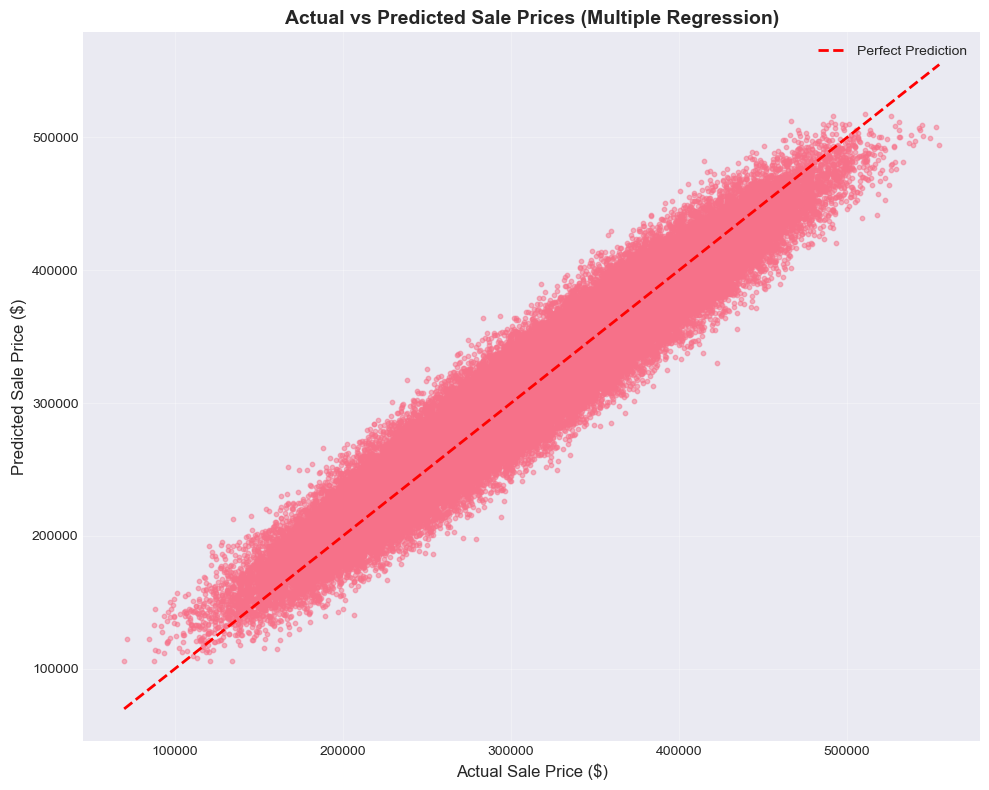

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, alpha=0.5, s=10)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Price ($)', fontsize=12)
plt.ylabel('Predicted Sale Price ($)', fontsize=12)
plt.title('Actual vs Predicted Sale Prices (Multiple Regression)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
##  Model Refinement

Check for multicollinearity and refine the model by removing insignificant predictors.


Checking for Multicollinearity (VIF):
VIF < 5: Low multicollinearity
VIF 5-10: Moderate multicollinearity
VIF > 10: High multicollinearity

     Feature   VIF
   YearBuilt 31.07
    FullBath  6.99
   GrLivArea  5.98
    Bedrooms  5.50
 OverallQual  4.73
     LotArea  4.69
Neighborhood  3.00
  GarageCars  2.81
   RoofStyle  2.81
BuildingType  2.79


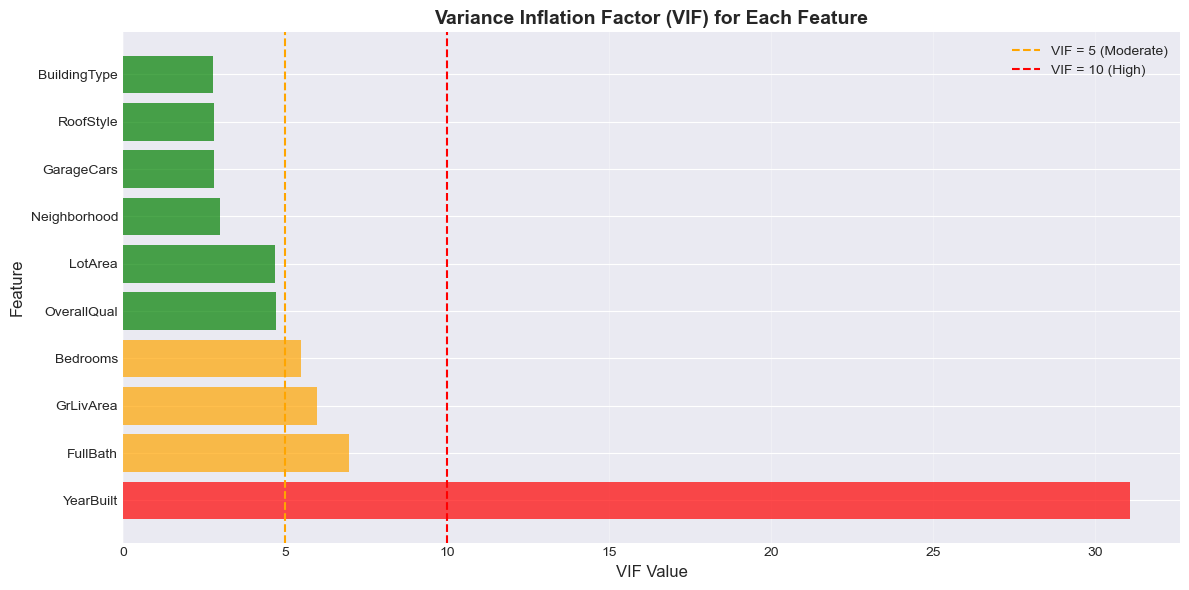


Features with high multicollinearity (VIF > 10):
  Feature   VIF
YearBuilt 31.07


In [19]:
# Calculate VIF (Variance Inflation Factor) for multicollinearity
print("\nChecking for Multicollinearity (VIF):")
print("=" * 80)
print("VIF < 5: Low multicollinearity")
print("VIF 5-10: Moderate multicollinearity")
print("VIF > 10: High multicollinearity\n")

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data.to_string(index=False))

# Visualize VIF
plt.figure(figsize=(12, 6))
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_data['VIF']]
plt.barh(vif_data['Feature'], vif_data['VIF'], color=colors, alpha=0.7)
plt.xlabel('VIF Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Variance Inflation Factor (VIF) for Each Feature', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='orange', linestyle='--', linewidth=1.5, label='VIF = 5 (Moderate)')
plt.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='VIF = 10 (High)')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Identify features with high VIF
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\nFeatures with high multicollinearity (VIF > 10):")
    print(high_vif.to_string(index=False))
else:
    print("\nNo features with high multicollinearity (all VIF < 10)")

In [20]:

print("\nFeature Importance Analysis:")
print("=" * 80)


feature_importance = coefficients_df.copy()
feature_importance['Importance'] = (feature_importance['Abs_Coefficient'] / 
                                     feature_importance['Abs_Coefficient'].sum() * 100)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance[['Feature', 'Coefficient', 'Importance']].to_string(index=False))


low_importance = feature_importance[feature_importance['Importance'] < 1.0]
if len(low_importance) > 0:
    print(f"\n Features with low importance (< 1%):")
    print(low_importance[['Feature', 'Importance']].to_string(index=False))
else:
    print("\n All features have importance >= 1%")


Feature Importance Analysis:
     Feature  Coefficient  Importance
 OverallQual     14954.19       59.04
  GarageCars      9984.03       39.42
   YearBuilt       198.80        0.78
   GrLivArea        49.98        0.20
Neighborhood       -39.23        0.15
   RoofStyle       -38.62        0.15
BuildingType        29.27        0.12
    FullBath        19.85        0.08
    Bedrooms        10.45        0.04
     LotArea         4.99        0.02

 Features with low importance (< 1%):
     Feature  Importance
   YearBuilt        0.78
   GrLivArea        0.20
Neighborhood        0.15
   RoofStyle        0.15
BuildingType        0.12
    FullBath        0.08
    Bedrooms        0.04
     LotArea        0.02


In [21]:
# can manually select features 
# features_to_keep = [feature for feature in X_train.columns if feature not in ['FeatureToRemove']]
# X_train_refined = X_train[features_to_keep]

X_train_refined = X_train.copy()

print(f"\nRefined model will use {X_train_refined.shape[1]} features")
print(f"Features: {list(X_train_refined.columns)}")


Refined model will use 10 features
Features: ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'FullBath', 'Bedrooms', 'Neighborhood', 'BuildingType', 'RoofStyle']


---
## 6️⃣ Model Validation

Perform diagnostic checks to ensure model reliability.

In [22]:
# Calculate residuals
residuals = y_train - y_train_pred

print("\n📊 Residual Analysis:")
print("=" * 80)
print(f"Mean of residuals: ${residuals.mean():,.2f} (should be close to 0)")
print(f"Std of residuals: ${residuals.std():,.2f}")


📊 Residual Analysis:
Mean of residuals: $-0.00 (should be close to 0)
Std of residuals: $20,010.53


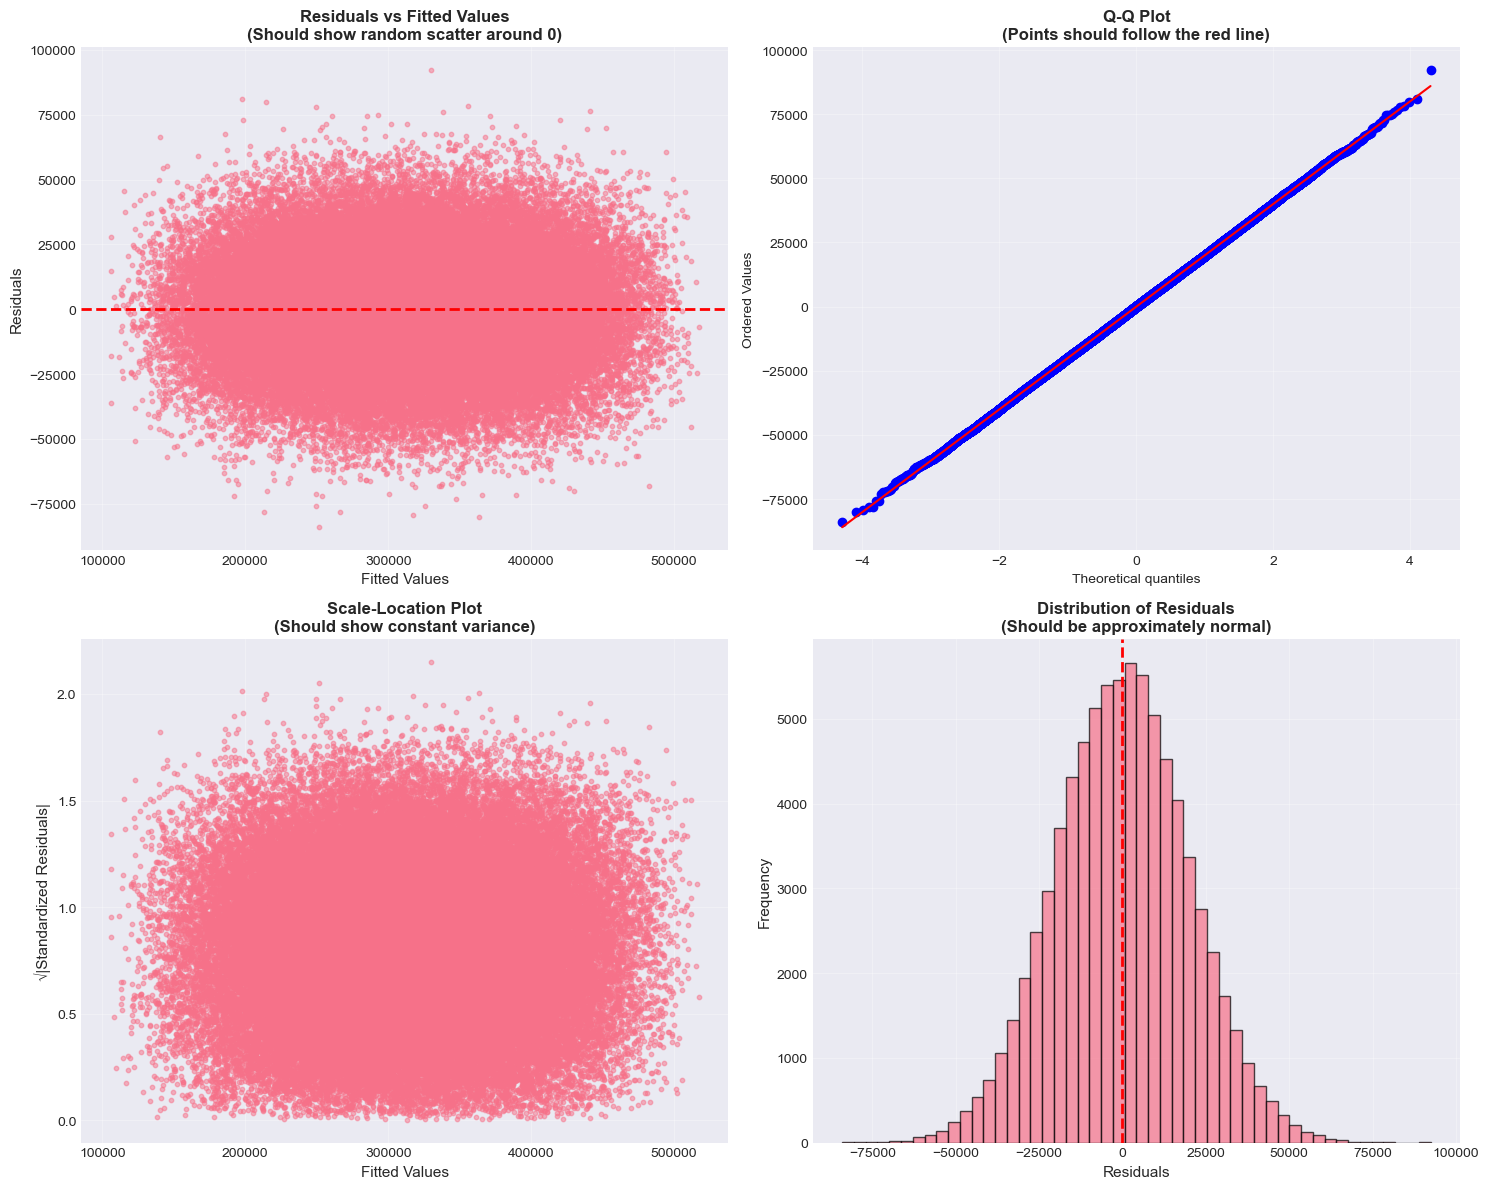

In [23]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].scatter(y_train_pred, residuals, alpha=0.5, s=10)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Residuals vs Fitted Values\n(Should show random scatter around 0)', 
                      fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)


stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot\n(Points should follow the red line)', 
                      fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)


standardized_residuals = residuals / residuals.std()
axes[1, 0].scatter(y_train_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.5, s=10)
axes[1, 0].set_xlabel('Fitted Values', fontsize=11)
axes[1, 0].set_ylabel('√|Standardized Residuals|', fontsize=11)
axes[1, 0].set_title('Scale-Location Plot\n(Should show constant variance)', 
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)


axes[1, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of Residuals\n(Should be approximately normal)', 
                      fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:

print("\n Statistical Validation:")
print("=" * 80)


sample_size = min(5000, len(residuals))
residuals_sample = np.random.choice(residuals, sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(residuals_sample)
print(f"\nShapiro-Wilk Test for Normality (sample of {sample_size}):")
print(f"  Statistic: {shapiro_stat:.6f}")
print(f"  P-value: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("  ✅Residuals appear to be normally distributed (p > 0.05)")
else:
    print("   Residuals may not be normally distributed (p < 0.05)")


print("\nHomoscedasticity Check:")
print("  Refer to 'Residuals vs Fitted' and 'Scale-Location' plots above")
print("  Residuals should show constant variance across fitted values")


 Statistical Validation:

Shapiro-Wilk Test for Normality (sample of 5000):
  Statistic: 0.999606
  P-value: 0.432213
  ✅Residuals appear to be normally distributed (p > 0.05)

Homoscedasticity Check:
  Refer to 'Residuals vs Fitted' and 'Scale-Location' plots above
  Residuals should show constant variance across fitted values


In [25]:
print("\n Model Performance Summary:")
print("=" * 80)
print(f"\nTraining Set Performance:")
print(f"  R² Score: {r2_train:.4f} ({r2_train*100:.2f}% variance explained)")
print(f"  RMSE: ${rmse_train:,.2f}")
print(f"  MAE: ${mae_train:,.2f}")
print(f"  Mean Sale Price: ${y_train.mean():,.2f}")
print(f"  RMSE as % of mean: {(rmse_train/y_train.mean())*100:.2f}%")
print(f"  MAE as % of mean: {(mae_train/y_train.mean())*100:.2f}%")


 Model Performance Summary:

Training Set Performance:
  R² Score: 0.9250 (92.50% variance explained)
  RMSE: $20,010.41
  MAE: $15,972.98
  Mean Sale Price: $312,078.72
  RMSE as % of mean: 6.41%
  MAE as % of mean: 5.12%


In [26]:
test_df = pd.read_csv('test_100k.csv')
print(f"Shape: {test_df.shape}")
print(f"Rows: {test_df.shape[0]:,} | Columns: {test_df.shape[1]}")

test_df.head()

Shape: (20000, 11)
Rows: 20,000 | Columns: 11


,Id,LotArea,OverallQual,YearBuilt,GrLivArea,GarageCars,FullBath,Bedrooms,Neighborhood,BuildingType,RoofStyle
0,75722,8568,9,2007,1754,3,2,1,South,2Fam,Gable
1,80185,2611,5,1993,3875,1,3,1,Central,1Fam,Gambrel
2,19865,8799,2,1954,2837,2,1,1,East,Duplex,Flat
3,76700,13947,7,1998,3988,0,3,5,North,Duplex,Hip
4,92992,11227,5,2016,1357,2,2,2,East,Duplex,Hip


In [27]:
# Prepare test data (encode categorical variables using same encoders)
test_df_encoded = test_df.copy()

for col in categorical_cols:
    test_df_encoded[col] = label_encoders[col].transform(test_df_encoded[col])

# Prepare features
X_test = test_df_encoded.drop(['Id'], axis=1)

print(f" Test data prepared")
print(f"Test features shape: {X_test.shape}")

 Test data prepared
Test features shape: (20000, 10)


In [28]:
print("\n🔮 Making Predictions on Test Set...")
print("=" * 80)

test_predictions = mlr_model.predict(X_test)

print(f"\nPredictions generated for {len(test_predictions):,} houses")
print(f"\nPrediction Statistics:")
print(f"  Mean: ${test_predictions.mean():,.2f}")
print(f"  Median: ${np.median(test_predictions):,.2f}")
print(f"  Std Dev: ${test_predictions.std():,.2f}")
print(f"  Min: ${test_predictions.min():,.2f}")
print(f"  Max: ${test_predictions.max():,.2f}")


🔮 Making Predictions on Test Set...

Predictions generated for 20,000 houses

Prediction Statistics:
  Mean: $311,518.90
  Median: $312,171.24
  Std Dev: $70,215.53
  Min: $105,969.43
  Max: $517,727.48


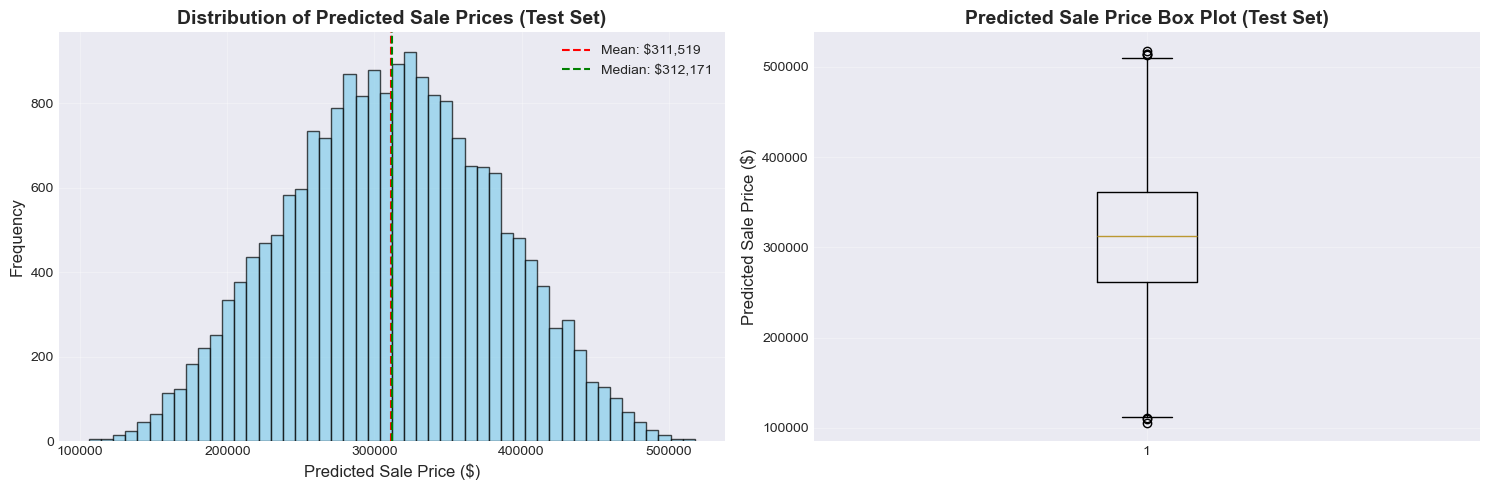

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Predicted Sale Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Predicted Sale Prices (Test Set)', fontsize=14, fontweight='bold')
axes[0].axvline(test_predictions.mean(), color='red', linestyle='--', 
                label=f"Mean: ${test_predictions.mean():,.0f}")
axes[0].axvline(np.median(test_predictions), color='green', linestyle='--', 
                label=f"Median: ${np.median(test_predictions):,.0f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(test_predictions, vert=True)
axes[1].set_ylabel('Predicted Sale Price ($)', fontsize=12)
axes[1].set_title('Predicted Sale Price Box Plot (Test Set)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Create submission file
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save to CSV
submission_df.to_csv('housing_price_predictions.csv', index=False)
print("\n Predictions saved to 'housing_price_predictions.csv'")
print(f"\nFirst 10 predictions:")
print(submission_df.head(10))


 Predictions saved to 'housing_price_predictions.csv'

First 10 predictions:
      Id  SalePrice
0  75722  356605.05
1  80185  350378.84
2  19865  286818.32
3  76700  433532.54
4  92992  282067.68
5  76435  227176.09
6  84005  256157.24
7  80918  210707.25
8  60768  256925.85
9  50075  391197.34


In [31]:
# Model interpretation summary
print("\n" + "="*80)
print("MODEL INTERPRETATION SUMMARY")
print("="*80)

print("\n1 5 IMPORTANT FEATURES:")
print("-" * 80)
top_features = feature_importance.head(5)
for idx, row in top_features.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   {row['Feature']:15s} - {impact} price by ${abs(row['Coefficient']):,.2f} per unit")
    print(f"                      (Importance: {row['Importance']:.2f}%)")

print("\n MODEL PERFORMANCE:")
print("-" * 80)
print(f"   R² Score: {r2_train:.4f} - Model explains {r2_train*100:.2f}% of price variance")
print(f"   RMSE: ${rmse_train:,.2f} - Average prediction error")
print(f"   MAE: ${mae_train:,.2f} - Typical prediction deviation")

print("\n MODEL EQUATION (simplified):")
print("-" * 80)
print(f"   SalePrice = ${mlr_model.intercept_:,.2f}")
for idx, row in top_features.iterrows():
    sign = "+" if row['Coefficient'] > 0 else "-"
    print(f"             {sign} ${abs(row['Coefficient']):,.2f} × {row['Feature']}")
print("             + ... (other features)")

print("\n VALIDATION CHECKS:")
print("-" * 80)
print(f"   ✓ Residuals centered at: ${residuals.mean():,.2f} (close to 0)")
print(f"   ✓ Multicollinearity: {len(vif_data[vif_data['VIF'] > 10])} features with VIF > 10")
print(f"   ✓ Normality test p-value: {shapiro_p:.6f}")

print("\n TEST SET PREDICTIONS:")
print("-" * 80)
print(f"   Predicted {len(test_predictions):,} house prices")
print(f"   Average predicted price: ${test_predictions.mean():,.2f}")
print(f"   Price range: ${test_predictions.min():,.2f} - ${test_predictions.max():,.2f}")

print("\n" + "="*80)
print(" ANALYSIS COMPLETE!")
print("="*80)


MODEL INTERPRETATION SUMMARY

1 5 IMPORTANT FEATURES:
--------------------------------------------------------------------------------
   OverallQual     - increases price by $14,954.19 per unit
                      (Importance: 59.04%)
   GarageCars      - increases price by $9,984.03 per unit
                      (Importance: 39.42%)
   YearBuilt       - increases price by $198.80 per unit
                      (Importance: 0.78%)
   GrLivArea       - increases price by $49.98 per unit
                      (Importance: 0.20%)
   Neighborhood    - decreases price by $39.23 per unit
                      (Importance: 0.15%)

 MODEL PERFORMANCE:
--------------------------------------------------------------------------------
   R² Score: 0.9250 - Model explains 92.50% of price variance
   RMSE: $20,010.41 - Average prediction error
   MAE: $15,972.98 - Typical prediction deviation

 MODEL EQUATION (simplified):
------------------------------------------------------------------------